In [2]:

import os

import pandas as pd
from matplotlib import pyplot as plt
import torch
import numpy as np


In [48]:

def curve(run_name, range_x=None, range_y=None):
    optimal = 5.7
    path2log = os.path.join('../checkpoints/', run_name, 'log.csv')
    fig, ax = plt.subplots(figsize=(10, 5))
    df = pd.read_csv(path2log)
    df['gap'] = 100 * (df['cost_val']-optimal) / optimal
    ax.plot(df['epoch'], df['gap'])
    
    
#    ax.set_xlim([1, None])
    
    ax.grid()
    ax.set(xlabel='Epoch', ylabel='Gap (%)')
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    
    if range_x is not None:
        ax.set_xlim(range_x)
    if range_y is not None:
        ax.set_ylim(range_y)
    plt.show()
    

In [215]:

def loss(run_name, range_x=None, range_y=None):
    path2log = os.path.join('../checkpoints/', run_name, 'log.csv')
    fig, ax = plt.subplots(figsize=(10, 5))
    df = pd.read_csv(path2log)
    ax.plot(df['epoch'], df['loss_policy'], label='Policy')
    ax.plot(df['epoch'], df['loss_value'], label='Value') 
    
    ax.grid()
    ax.set(xlabel='Epoch', ylabel='Loss')
    # ax.set_xscale('log')
    #ax.set_yscale('log')
    
    
    if range_x is not None:
        ax.set_xlim(range_x)
    if range_y is not None:
        ax.set_ylim(range_y)
    ax.legend()
    plt.show()
    

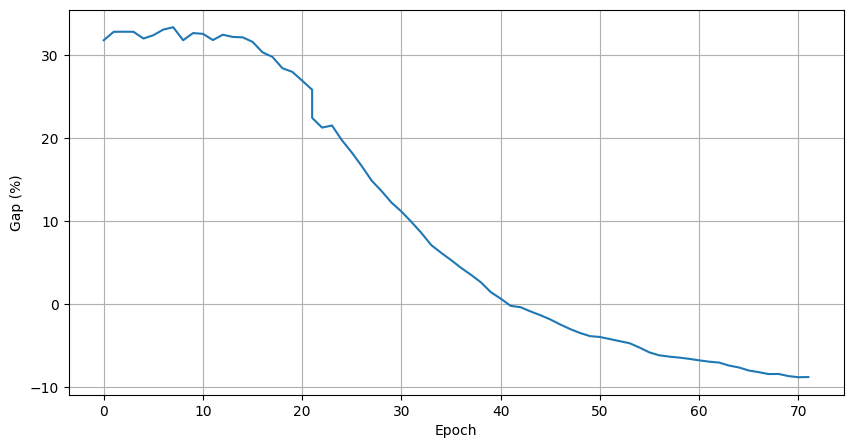

In [238]:

curve('test')


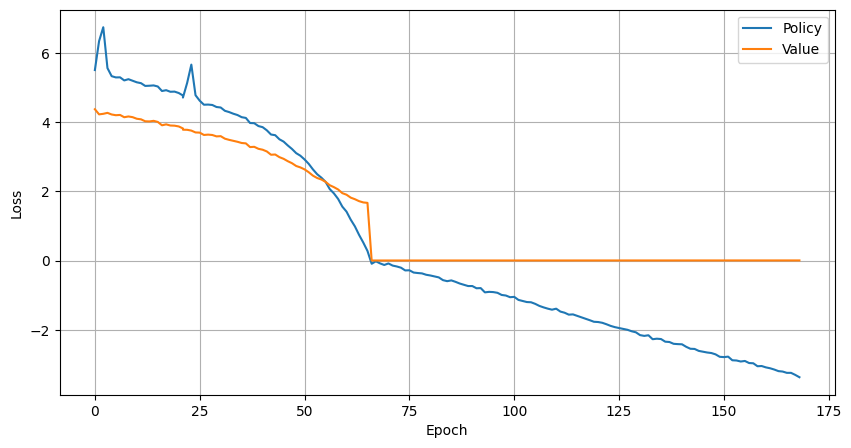

In [240]:

loss('test')
